In [1]:
import time, requests, io, datetime
import pydocmaker as pyd

# THIS IS A TEST NOTEBOOK TO PROTOTYPE THE EXECUTION CODE

In [2]:
# NOTE: The string or node provided for parameters must be self contained and only consist of the following Python literal structures: 
# strings, bytes, numbers, tuples, lists, dicts, sets, booleans, and None

In [3]:
script_id = ''
dbserver_uri = 'http://localhost:8000'
device_id = ''

param1 = 5 # test paramaeter 1
param2 = 'A' # test paramaeter 1
param3 = ['A', 'B', 'C'] # test paramaeter 1
dict_param = {
    'subdict': {
    'myval1': 1,
    'myval2': 2,
    },
    'sublist': [1, 2, 3]
}


# Some Dummy Code

In [4]:
print(f'hello world from {script_id=}!')

hello world from script_id=''!


In [5]:
def upload_file(filename:str, byte_data:bytes, mimetype='text/plain'):
    """this is how to upload a file

    Args:
        filename (str): the filename e.g. mytestfile.txt
        byte_data (bytes): the file content as bytes or string
        mimetype (str, optional): the file mimetype. Defaults to 'text/plain'.

    Returns:
        dict: the response from "/action/script/{script_id}/upload/files route"
    """

    url = f'{dbserver_uri}/action/script/{script_id}/upload/files'

    if isinstance(byte_data, str):
        byte_data = byte_data.encode()

    # Send the request with bytes as a file
    files = {'files': (filename, io.BytesIO(byte_data), mimetype)}

    response = requests.post(url, files=files)
    response.raise_for_status()
    return response.json()

def upload_doc(doc, report_name='', as_loose_doc=False):
    """Uploads a document to the server.

    Args:
        doc (DocBuilder): The document to upload.
        report_name (str, optional): The name of the uploaded document. Defaults to a timestamp-based name assigned by the backend.
        as_loose_doc (bool, optional): Whether to upload the document as a loose document (detached from the currently running script). Defaults to False.

    Returns:
        dict: The JSON response from the server after uploading the document.
    """
    
    if as_loose_doc:
        url = f'{dbserver_uri}/doc/upload'
    else:
        url = f'{dbserver_uri}/action/script/{script_id}/upload/doc'

    return doc.upload(url, report_name)


In [6]:
for i in range(param1):
    time.sleep(1)
    print(i)
    print((param1, param2))

0
(5, 'A')
1
(5, 'A')
2
(5, 'A')
3
(5, 'A')
4
(5, 'A')


Text(0.5, 0.5, 'watermark')

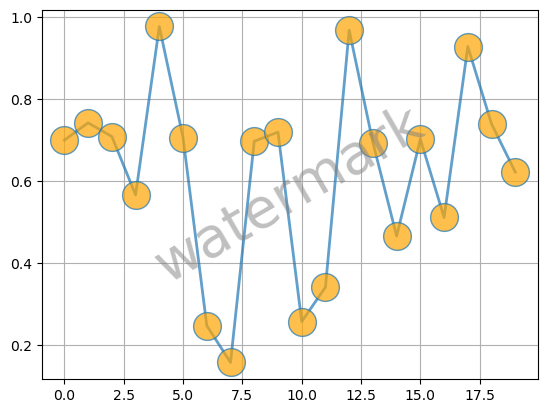

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ax.plot(np.random.rand(20), '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.grid()

ax.text(0.5, 0.5, 'watermark', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation=30)


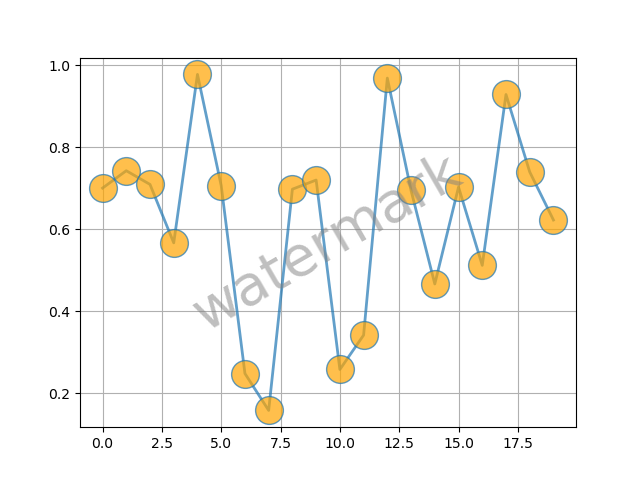

In [8]:
doc = pyd.DocBuilder()
doc.add_chapter('Introduction')

doc.add("this is some text to add to the introduction")

doc.add_chapter('Results')

txt = """This chapter is an example on how to upload results to your Report."""
doc.add_kw('markdown', txt)

restxt = ''
for i in range(10):
    v = np.random.rand()
    restxt += f'- **testcase {i}**: value {v:.2f} **{"PASS" if v < 5 else "FAIL"}**\n'
doc.add_kw('markdown', restxt)


doc.add_fig(fig, caption='This is a test plot. It is just to illustrate, that you can also add plots to a report')

txt = """

Theorists in astronomy endeavor to create theoretical models that are based on existing observations and known physics, and to predict observational consequences of those models. The observation of phenomena predicted by a model allows astronomers to select between several alternative or conflicting models. Theorists also modify existing models to take into account new observations. In some cases, a large amount of observational data that is inconsistent with a model may lead to abandoning it largely or completely, as for geocentric theory, the existence of luminiferous aether, and the steady-state model of cosmic evolution.

Phenomena modeled by theoretical astronomers include:

- stellar dynamics and evolution
- galaxy formation
- large-scale distribution of matter in the Universe
- the origin of cosmic rays
- general relativity and physical cosmology, including string cosmology and astroparticle physics.

"""

doc.add_kw('markdown', txt)

doc.add('This is some preformatted text:')

txt = """
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ax.plot(np.random.rand(20), '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.grid()

ax.text(0.5, 0.5, 'watermark', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation=30)
"""
doc.add_kw('verbatim', txt)


doc.add('\n' * 3 + 'END OF DOCUMENT ')
doc.show()

In [9]:
upload_doc(doc)